In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import plotly 

In [2]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [7]:
df.isnull().sum().sum()

317

In [8]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [10]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [11]:
df['rating'].unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

In [13]:
df['type']=df['type'].fillna('TV')

In [14]:
df['genre']=df['genre'].fillna('Hentai')

In [15]:
df.dropna(subset=['rating'], inplace=True)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.duplicated().sum()

0

In [19]:
df['name'].unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [27]:
df['name'] = df['name'].str.replace('!', '').str.replace(':', '').str.replace('°', '').str.replace('.','').str.replace('&#039;','').str.replace(',','')
df['name'] = df['name'].str.replace('II','').str.replace('-','').str.replace('Â','').str.replace('â˜…','')

In [28]:
df['name'] = df['name'].str.title()

In [29]:
df['name'].unique()

array(['Kimi No Na Wa', 'Fullmetal Alchemist Brotherhood', 'Gintama', ...,
       'Violence Gekiga David No Hoshi',
       'Violence Gekiga Shin David No Hoshi Inma Densetsu',
       'Yasuji No Pornorama Yacchimae'], dtype=object)

In [30]:
df['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081])

In [31]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [32]:
df['episodes'] = df['episodes'].replace('Unknown', np.nan)
df.dropna(subset=['episodes'], inplace=True)

In [33]:
df['anime_id'] = df['anime_id'].astype(int)
df['episodes'] = df['episodes'].astype(int)

In [34]:
rf=pd.read_csv('rating.csv')
rf.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [35]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [36]:
rf.isnull().sum().sum()

0

In [37]:
rf.duplicated().sum()

1

In [40]:
rf.drop_duplicates(inplace=True)

In [41]:
rf.duplicated().sum()

0

In [43]:
mf = pd.merge(df, rf, on='anime_id')

In [44]:
mf.tail()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7813711,6133,Violence Gekiga Shin David No Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,39532,-1
7813712,6133,Violence Gekiga Shin David No Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,48766,-1
7813713,6133,Violence Gekiga Shin David No Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4
7813714,26081,Yasuji No Pornorama Yacchimae,Hentai,Movie,1,5.46,142,27364,-1
7813715,26081,Yasuji No Pornorama Yacchimae,Hentai,Movie,1,5.46,142,48766,-1


In [45]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813716 entries, 0 to 7813715
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int32  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  int32  
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int32(2), int64(3), object(3)
memory usage: 476.9+ MB


In [46]:
mf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,7813716.0,NaN,NaN,NaN,8909.019809,8883.898873,1.0,1240.0,6213.0,14093.0,34519.0
name,7813716,11167,Death Note,39340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,7813716,3154,Hentai,62545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7813716,6,TV,5283592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,7813716.0,NaN,NaN,NaN,18.441258,35.08499,1.0,2.0,12.0,24.0,1818.0
rating_x,7813716.0,NaN,NaN,NaN,7.653128,0.673027,1.67,7.27,7.68,8.13,9.5
members,7813716.0,NaN,NaN,NaN,178620.904431,188176.295924,29.0,44030.0,110470.0,244268.0,1013917.0
user_id,7813716.0,NaN,NaN,NaN,36727.953828,20997.960434,1.0,18974.0,36791.0,54757.25,73516.0
rating_y,7813716.0,NaN,NaN,NaN,6.144038,3.727794,-1.0,6.0,7.0,9.0,10.0


Text(0, 0.5, 'Anime Title')

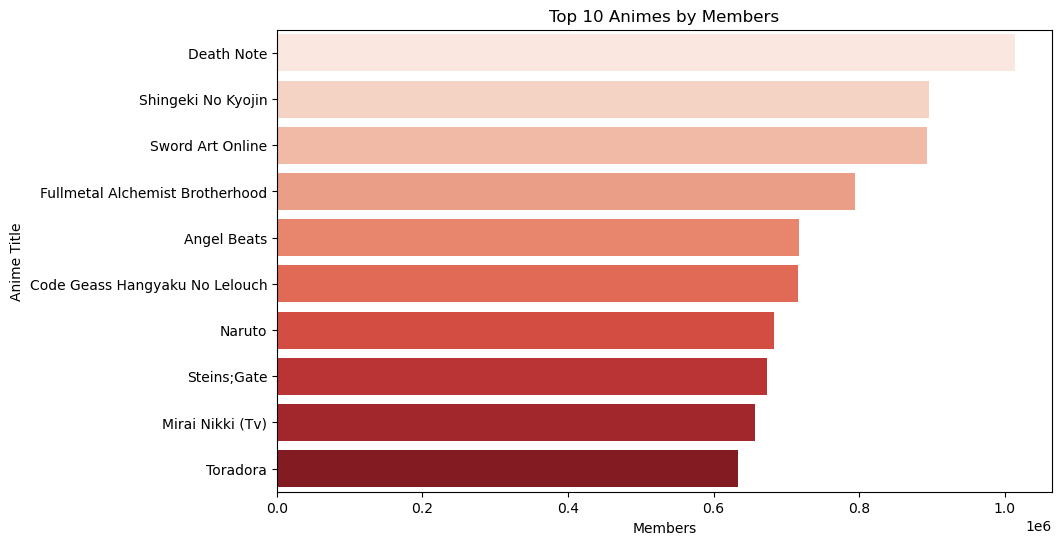

In [56]:
# Identify top 10 anime titles by members
top_animes = df.sort_values(by='members', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='members', y='name', data=top_animes, palette='Reds')
plt.title('Top 10 Animes by Members')
plt.xlabel('Members')
plt.ylabel('Anime Title')

Text(0, 0.5, 'Count')

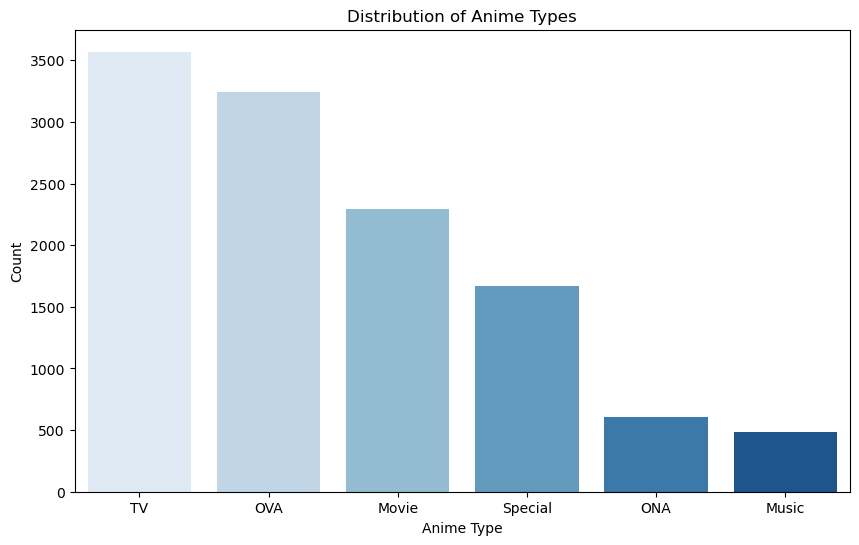

In [63]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Blues')
plt.title('Distribution of Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Count')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0, 0.5, 'Frequency')

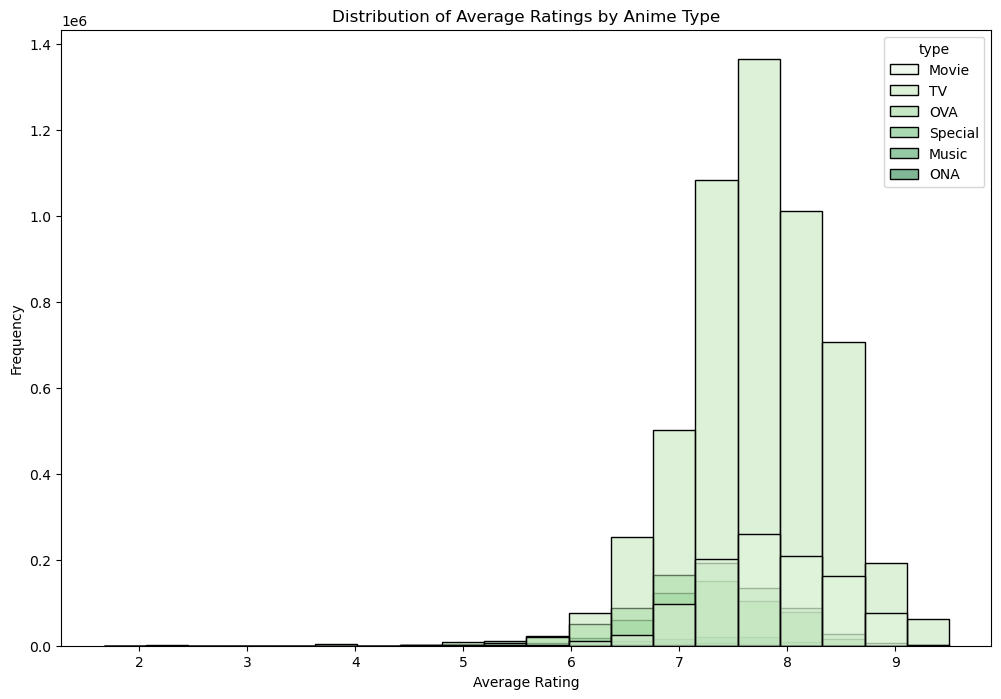

In [69]:
plt.figure(figsize=(12, 8))
sns.histplot(data=mf, x='rating_x', hue='type', palette='Greens', bins=20)
plt.title('Distribution of Average Ratings by Anime Type')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0, 0.5, 'Frequency')

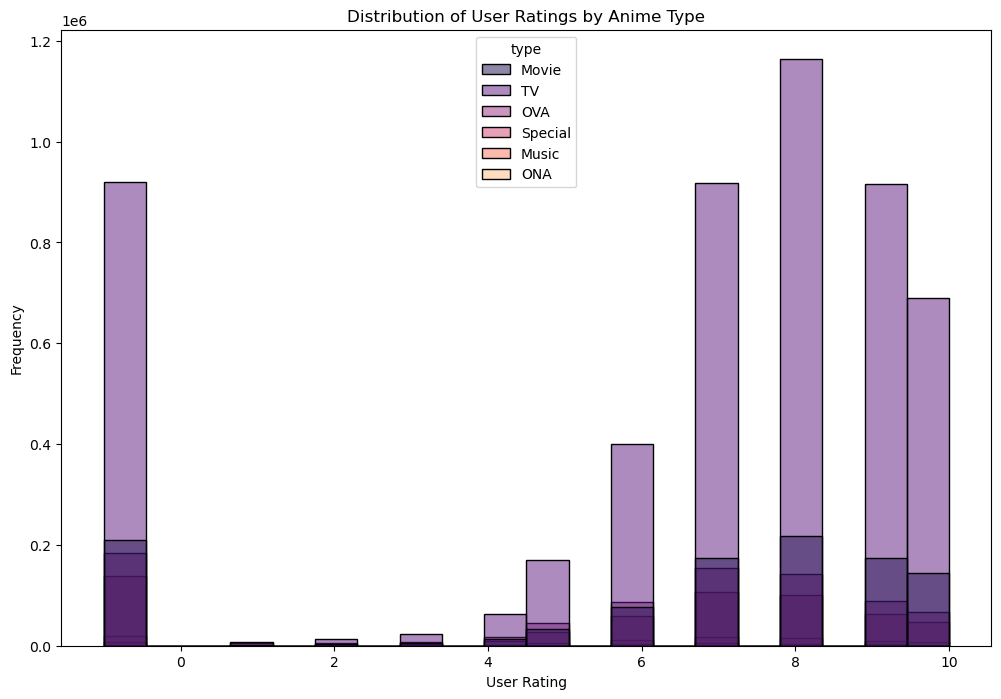

In [70]:
plt.figure(figsize=(12, 8))
sns.histplot(data=mf, x='rating_y', hue='type', palette='magma', bins=20)
plt.title('Distribution of User Ratings by Anime Type')
plt.xlabel('User Rating')
plt.ylabel('Frequency')